In [1]:
import numpy as np

In [2]:
x = var ("x")

In [8]:
def w(pts): #произведение (x - xi), xi подаются в виде набора точек (x,y)
    rf = (x - pts[0])
    for i in range(1,len(pts)):
        rf*=(x - pts[i])
    return rf

def Lagrange(pts):
    func = 0
    ptsA = np.array(pts)
    for i in range(len(pts)):
        try:
            func += pts[i][1]*w(ptsA[:,0])/((x - pts[i][0])*w(ptsA[:,0]).derivative()(x = pts[i][0]))
        except (BaseException):
            print("exc")
        
    return func

def d_s(fs,xs):#разделение разности
    if(len(xs) == 2):
        return (fs[1]-fs[0])/(xs[1]-xs[0])
    else:
        return (d_s(fs[0:(len(xs)-1)],xs[0:(len(xs)-1)]) - 
                d_s(fs[1:(len(xs))],xs[1:(len(xs))]))/(xs[0] - xs[len(xs) - 1])

def Newton(pts):
    func = pts[0][1]
    ptsA = np.array(pts)
    for i in range(1,len(pts)):
        func += w(ptsA[0:i][:,0]) * d_s(ptsA[0:i + 1][:,1],ptsA[0:i + 1][:,0])
    return func

In [9]:
def error(pts,fnc): #рассчет функции ошибок
    ptsA = np.array(pts)
    M = np.max(ptsA[:,1])
    res = M*(abs(w(ptsA[:,0])))/factorial(len(pts) + 1)
    return res

In [10]:
def buldArr(X,f): #построение массива точек (x, f(x))
    res = []
    for a in X: 
        res.append((a,f(x = a).n(digits = 5)))
    return res

In [11]:
fa = sqrt(x) #интерполируемая функия
X1 = [0,1.7,3.4,5.1] #набор точек 1
X2 = [0,1.7,4.0,5.1] #набор точек 2

pts1 = buldArr(X1,fa)
pts2 = buldArr(X2,fa)

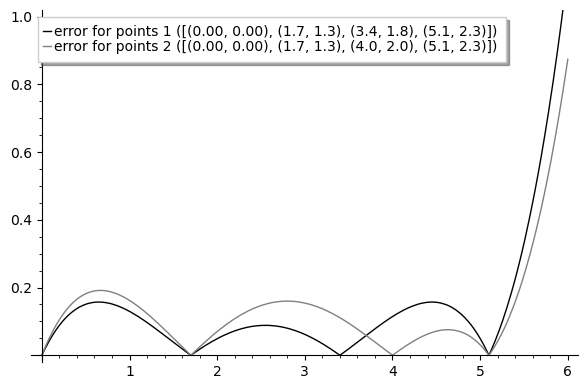

In [12]:
def formt_for_show(pts):
    res = []
    for a in pts:
        res.append((a[0].n(digits = 2),a[1].n(digits = 2)))
    return res 

show(plot(error(pts1,sqrt(x)),xmin = 0, xmax = 6,ymax = 1,color = "black",legend_label = "error for points 1 ({})".format(formt_for_show(pts1))) + 
     plot(error(pts2,sqrt(x)),xmin = 0, xmax = 6,ymax = 1,color = "grey",legend_label = "error for points 2 ({})".format(formt_for_show(pts2)))) 

In [13]:
def points_to_plot(pts):
    pl = point(pts[0],color = "red",size = 20)
    for i in range(1,len(pts)):
        pl += point(pts[i],color = "red",size = 20)
    return pl

'Интерполяция по точкам 1\nТочки:  [(0.00, 0.00), (1.7, 1.3), (3.4, 1.8), (5.1, 2.3)]'

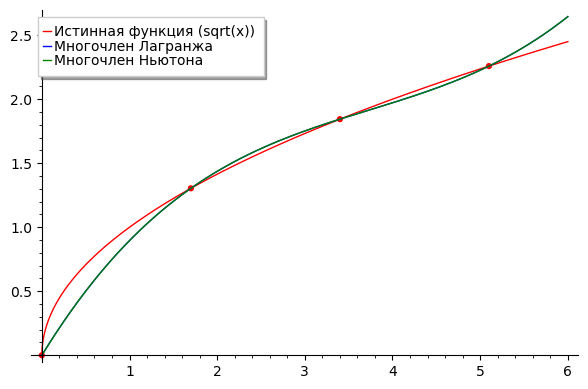

In [14]:
show("Интерполяция по точкам 1\nТочки:  {}".format(formt_for_show(pts1)))
show(plot(sqrt(x),color = "red",xmin = 0,xmax=6,legend_label = "Истинная функция (sqrt(x))") + 
     plot(Lagrange(pts1),xmin = 0,xmax=6,color = "blue",legend_label = "Многочлен Лагранжа") + 
     plot(Newton(pts1),xmin = 0,xmax=6,color = "green",legend_label = "Многочлен Ньютона") + 
     points_to_plot(pts1))

'Интерполяция по точкам 2\nТочки:  [(0.00, 0.00), (1.7, 1.3), (4.0, 2.0), (5.1, 2.3)]'

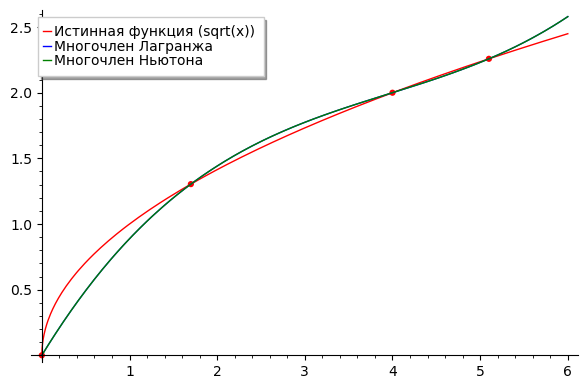

In [15]:
show("Интерполяция по точкам 2\nТочки:  {}".format(formt_for_show(pts2)))
show(plot(sqrt(x),color = "red",xmin = 0,xmax=6,legend_label = "Истинная функция (sqrt(x))") + 
     plot(Lagrange(pts2),xmin = 0,xmax=6,color = "blue",legend_label = "Многочлен Лагранжа") + 
     plot(Newton(pts2),xmin = 0,xmax=6,color = "green",legend_label = "Многочлен Ньютона") + 
     points_to_plot(pts2))

In [19]:
show(Lagrange(pts1))
show(Newton(pts1))

2.2583*(x - 1.7)*(x - 3.4)*(x - 5.1)*x/(29.47799999999999*x - 150.337800000000) + 1.3038*(x - 1.7)*(x - 3.4)*(x - 5.1)*x/(9.825999999999999*x - 16.7042000000000) + 1.8439*(x - 1.7)*(x - 3.4)*(x - 5.1)*x/(-9.825999999999999*x + 33.4084000000000)

0.021647222896663675*(x - 1.7)*(x - 3.4)*x - 0.1321406512936919*(x - 1.7)*x + 0.7669650807100185*x

In [18]:
show(Lagrange(pts2))

2.2583*(x - 1.7)*(x - 4.0)*(x - 5.1)*x/(19.073999999999987*x - 97.2773999999999) + 1.3038*(x - 1.7)*(x - 4.0)*(x - 5.1)*x/(13.293999999999997*x - 22.5998000000000) + 2.0000*(x - 1.7)*(x - 4.0)*(x - 5.1)*x/(-10.119999999999996*x + 40.4800000000000)

## Вычисляем значение погрешности интерполяции

In [11]:
ptx = 3.0

'Для набора точек 1 ([(0.00, 0.00), (1.7, 1.3), (3.4, 1.8), (5.1, 2.3)])'

'Априорная ошибка в точке X* = 3.0 равна 0.06165'

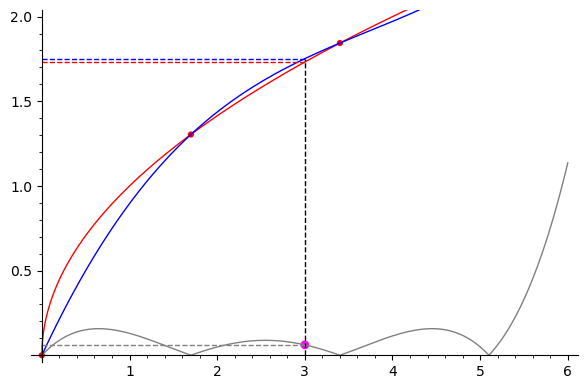

'Истинная ошибка в точке X* = 3.0 равна 0.01973, что меньше, чем 0.06165'

In [12]:
ptxErr = error(pts1,sqrt(x))(ptx)

show("Для набора точек 1 ({})".format(formt_for_show(pts1)))
show("Априорная ошибка в точке X* = {} равна {}".format(ptx.n(digits = 2),ptxErr.n(digits = 4)))
show(plot(error(pts1,sqrt(x)),xmin = 0, xmax = 6,ymax = 2,color = "grey") + 
     plot(sqrt(x),color = "red",xmin = 0,xmax=6) +
     plot(Lagrange(pts1),xmin = 0,xmax=6,color = "blue") +
     point((ptx,ptxErr),color = "magenta",size = 40) + 
     line([(ptx,0),(ptx,Lagrange(pts1)(ptx))],color = "black",linestyle="--") +
     line([(0,ptxErr),(ptx,ptxErr)],color = "grey",linestyle="--") +
     line([(0,Lagrange(pts1)(ptx)),(ptx,Lagrange(pts1)(ptx))],linestyle="--") +
     line([(0,sqrt(ptx)),(ptx,sqrt(ptx))],color = "red",linestyle="--") +
     points_to_plot(pts1))
show("Истинная ошибка в точке X* = {} равна {}, что меньше, чем {}".format(ptx.n(digits = 2),
                                                                      (abs(Lagrange(pts1)(ptx) - sqrt(ptx))).n(digits = 4),
                                                                      ptxErr.n(digits = 4)))

'Для набора точек 2 ([(0.00, 0.00), (1.7, 1.3), (4.0, 2.0), (5.1, 2.3)])'

'Априорная ошибка в точке X* = 3.0 равна 0.1541'

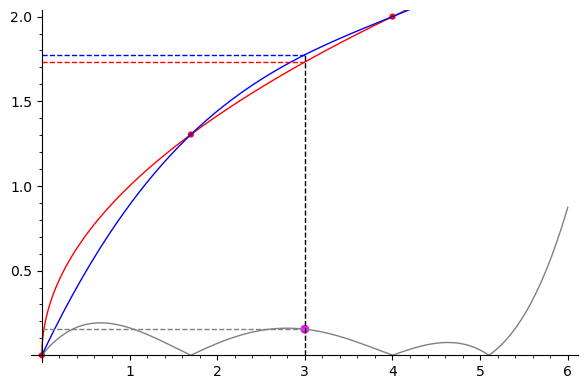

'Истинная ошибка в точке X* = 3.0 равна 0.04266, что меньше, чем 0.1541'

In [13]:
ptxErr = error(pts2,sqrt(x))(ptx)

show("Для набора точек 2 ({})".format(formt_for_show(pts2)))
show("Априорная ошибка в точке X* = {} равна {}".format(ptx.n(digits = 2),ptxErr.n(digits = 4)))
show(plot(error(pts2,sqrt(x)),xmin = 0, xmax = 6,ymax = 2,color = "grey") + 
     plot(sqrt(x),color = "red",xmin = 0,xmax=6) +
     plot(Lagrange(pts2),xmin = 0,xmax=6,color = "blue") +
     point((ptx,ptxErr),color = "magenta",size = 40) + 
     line([(ptx,0),(ptx,Lagrange(pts2)(ptx))],color = "black",linestyle="--") +
     line([(0,ptxErr),(ptx,ptxErr)],color = "grey",linestyle="--") +
     line([(0,Lagrange(pts2)(ptx)),(ptx,Lagrange(pts2)(ptx))],linestyle="--") +
     line([(0,sqrt(ptx)),(ptx,sqrt(ptx))],color = "red",linestyle="--") +
     points_to_plot(pts2))
show("Истинная ошибка в точке X* = {} равна {}, что меньше, чем {}".format(ptx.n(digits = 2),
                                                                      (abs(Lagrange(pts2)(ptx) - sqrt(ptx))).n(digits = 4),
                                                                      ptxErr.n(digits = 4)))